# Reference Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from patsy import dmatrices
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sma
import sys
sys.path.append('../..')
from household_contact_tracing.utilities import estimate_growth_rates
sns.set()

We generate reference data by simulating the epidemic with no contact tracing. Through this, we can gain an understanding of how well contact tracing is able to control the epidemic in terms of a growth rate reduction.

This is done using the simulation script - "Simulate_growth_rates_no_tracing.py"

In [2]:
# Import the data
reference_data = pd.read_excel("../../Data/Reference/growth_rates_no_tracing.xlsx", index_col = 0)

In [3]:
reference_data

,infection_reporting_prob,global_contact_reduction,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
0,0.1,0.0,5000,5013,5351,6387,8408,11490,15452,20070,...,41349,52321,66136,83193,104375,130628,163464,205035,256452,319888
1,0.2,0.0,5000,5012,5331,6505,8602,11672,15682,20471,...,42224,53492,67402,84633,106527,133782,167681,209848,261989,327562
2,0.3,0.0,5000,5009,5321,6417,8503,11619,15549,20358,...,42006,52985,66918,84261,105747,132433,165918,207507,259488,324075
3,0.4,0.0,5000,5024,5340,6516,8788,11947,16010,21032,...,43489,55328,69945,88158,110724,138811,173885,217825,272313,340475
4,0.5,0.0,5000,5019,5403,6561,8802,12179,16394,21323,...,44482,56301,71315,89756,112800,141826,177903,222357,278727,348017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.1,0.9,5000,5004,5103,5363,5888,6616,7405,8102,...,9529,9919,10302,10618,10938,11198,11419,11610,11776,11940
246,0.2,0.9,5000,5002,5079,5348,5866,6529,7287,7956,...,9315,9656,9995,10315,10576,10827,11032,11214,11393,11555
247,0.3,0.9,5000,5004,5096,5356,5857,6521,7227,7893,...,9240,9574,9860,10143,10388,10580,10758,10917,11050,11171
248,0.4,0.9,5000,5005,5091,5375,5863,6538,7290,7954,...,9296,9636,9944,10216,10446,10665,10823,10962,11074,11201


In [4]:
reference_data = estimate_growth_rates(reference_data)

Text(0, 0.5, 'Frequency')

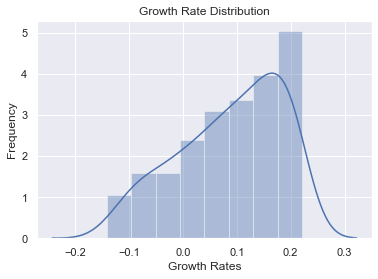

In [5]:
sns.distplot(reference_data["growth_rate"])
plt.title("Growth Rate Distribution")
plt.xlabel("Growth Rates")
plt.ylabel("Frequency")

In [6]:
results = reference_data[["global_contact_reduction", "infection_reporting_prob"]]

In [7]:
results["growth_rate"] = pd.Series(reference_data["growth_rate"])

<ipython-input-7-f30719328877>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["growth_rate"] = pd.Series(reference_data["growth_rate"])


Create a data table of the observed growth rate and 

In [8]:
results

,global_contact_reduction,infection_reporting_prob,growth_rate
0,0.0,0.1,0.219913
1,0.0,0.2,0.220550
2,0.0,0.3,0.220244
3,0.0,0.4,0.220124
4,0.0,0.5,0.220843
...,...,...,...
245,0.9,0.1,-0.115203
246,0.9,0.2,-0.099721
247,0.9,0.3,-0.127040
248,0.9,0.4,-0.136119


In [12]:
def growth_rate_to_doubling_time(growth_rates):
    return np.sign(growth_rates) * (np.log(2) / (np.sign(growth_rates) * growth_rates))

def doubling_time_to_growth_rate(doubling_times):
    return np.sign(doubling_times) * ( np.log(2) / (np.sign(doubling_times) * doubling_times))

<ipython-input-12-e3933c76672f>:5: RuntimeWarning: divide by zero encountered in true_divide
  return np.sign(doubling_times) * ( np.log(2) / (np.sign(doubling_times) * doubling_times))
<ipython-input-12-e3933c76672f>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sign(doubling_times) * ( np.log(2) / (np.sign(doubling_times) * doubling_times))
<ipython-input-12-e3933c76672f>:2: RuntimeWarning: invalid value encountered in sign
  return np.sign(growth_rates) * (np.log(2) / (np.sign(growth_rates) * growth_rates))


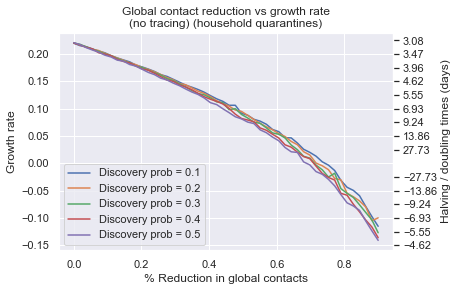

In [27]:
fig, ax = plt.subplots()

y_vals = np.linspace(-0.15, 0.25, 17)
y_vals = np.concatenate((y_vals[:6], y_vals[7:]))

for infection_report_value in [0.1, 0.2, 0.3, 0.4, 0.5]:
    
    subset = results[results["infection_reporting_prob"] == infection_report_value]
    
    plt.plot("global_contact_reduction", "growth_rate", data = subset)

ax2 = ax.secondary_yaxis("right", functions=(growth_rate_to_doubling_time, doubling_time_to_growth_rate))
ax2.set_ticks(growth_rate_to_doubling_time(y_vals), minor = False)

plt.legend(["Discovery prob = 0.1",
           "Discovery prob = 0.2",
           "Discovery prob = 0.3",
           "Discovery prob = 0.4",
           "Discovery prob = 0.5"])

plt.ylabel("Growth rate")
plt.xlabel("% Reduction in global contacts")
plt.title("Global contact reduction vs growth rate\n(no tracing) (household quarantines)")
ax2.set_ylabel("Halving / doubling times (days)")
plt.savefig("../../Figures/Reference Data/reference_curve.svg")

There's some pretty clear heteroscedasticity in the results. We estimate the mean growth rate using robust linear regression to cope with it (I tried iteratively reweighted least squares but can't figure it out at the moment).

In [22]:
y, X = dmatrices('growth_rate ~ global_contact_reduction + I(global_contact_reduction**2) + I(global_contact_reduction**3)',
                 data = results)
model = sma.RLM(y, X)
res = model.fit()
print(res.summary())
#sm.graphics.regressionplots.plot_fit(res, "global_contact_reduction")

                    Robust linear Model Regression Results                    
Dep. Variable:            growth_rate   No. Observations:                  250
Model:                            RLM   Df Residuals:                      246
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 11 Jun 2020                                         
Time:                        19:49:55                                         
No. Iterations:                    38                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [24]:
df = pd.DataFrame([res.params], columns = ["intercept", "coef_contact_reduction", "coef_contact_reduction**2", "coef_contact_reduction**2"])

We export the OLS coefficients so that the reference curve can be drawn in other notebooks.

In [25]:
df.to_excel("../../Data/Reference/OLS_coefficients.xlsx")